In [1]:
import transbigdata

In [2]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import LineString
dfA = gpd.GeoDataFrame([[1,2],[2,4],[2,6],
                        [2,10],[24,6],[21,6],
                        [22,6]],columns = ['lon1','lat1'])
dfB = gpd.GeoDataFrame([[1,3],[2,5],[2,2]],columns = ['lon','lat'])

# 点与点匹配（DataFrame与DataFrame）

In [3]:
#如果是DataFrame与DataFrame匹配，则需要指定前后两个表的经纬度列
transbigdata.ckdnearest(dfA,dfB,Aname=['lon1','lat1'],Bname=['lon','lat'])
#此时计算出的距离为经纬度换算实际距离

,lon1,lat1,index,lon,lat,dist
0,1,2,0,1,3,1.111949e+05
1,2,4,1,2,5,1.111949e+05
2,2,6,1,2,5,1.111949e+05
3,2,10,1,2,5,5.559746e+05
4,24,6,1,2,5,2.437393e+06
5,21,6,1,2,5,2.105798e+06
6,22,6,1,2,5,2.216318e+06


# 点与点匹配（GeoDataFrame与GeoDataFrame）

In [4]:
dfA['geometry'] = gpd.points_from_xy(dfA['lon1'],dfA['lat1'])
dfB['geometry'] = gpd.points_from_xy(dfB['lon'],dfB['lat'])

In [5]:
transbigdata.ckdnearest_point(dfA,dfB)
#此时计算出的距离为经纬度距离

,lon1,lat1,geometry_x,dist,index,lon,lat,geometry_y
0,1,2,POINT (1.00000 2.00000),1.000000,0,1,3,POINT (1.00000 3.00000)
1,2,4,POINT (2.00000 4.00000),1.000000,1,2,5,POINT (2.00000 5.00000)
2,2,6,POINT (2.00000 6.00000),1.000000,1,2,5,POINT (2.00000 5.00000)
3,2,10,POINT (2.00000 10.00000),5.000000,1,2,5,POINT (2.00000 5.00000)
4,24,6,POINT (24.00000 6.00000),22.022716,1,2,5,POINT (2.00000 5.00000)
5,21,6,POINT (21.00000 6.00000),19.026298,1,2,5,POINT (2.00000 5.00000)
6,22,6,POINT (22.00000 6.00000),20.024984,1,2,5,POINT (2.00000 5.00000)


# 点与线匹配（GeoDataFrame与GeoDataFrame）

In [6]:
dfA['geometry'] = gpd.points_from_xy(dfA['lon1'],dfA['lat1'])
dfB['geometry'] = [LineString([[1,2],[1.5,2.5],[3.2,4]]),
                  LineString([[1,4],[1,2],[5,4]]),
                   LineString([[4,2],[3,2],[3,4]])]

<AxesSubplot:>

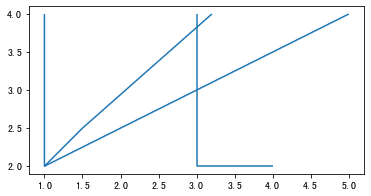

In [7]:
dfB.plot()

其原理是将线中的折点提取，然后使用点匹配点

In [8]:
transbigdata.ckdnearest_line(dfA,dfB)
#此时计算出的距离为经纬度距离

,lon1,lat1,geometry_x,dist,index,lon,lat,geometry_y
0,1,2,POINT (1.00000 2.00000),0.000000,0,1,3,"LINESTRING (1.00000 2.00000, 1.50000 2.50000, ..."
1,2,4,POINT (2.00000 4.00000),1.000000,1,2,5,"LINESTRING (1.00000 4.00000, 1.00000 2.00000, ..."
2,2,6,POINT (2.00000 6.00000),2.236068,1,2,5,"LINESTRING (1.00000 4.00000, 1.00000 2.00000, ..."
3,2,10,POINT (2.00000 10.00000),6.082763,1,2,5,"LINESTRING (1.00000 4.00000, 1.00000 2.00000, ..."
4,24,6,POINT (24.00000 6.00000),19.104973,1,2,5,"LINESTRING (1.00000 4.00000, 1.00000 2.00000, ..."
5,21,6,POINT (21.00000 6.00000),16.124515,1,2,5,"LINESTRING (1.00000 4.00000, 1.00000 2.00000, ..."
6,22,6,POINT (22.00000 6.00000),17.117243,1,2,5,"LINESTRING (1.00000 4.00000, 1.00000 2.00000, ..."
